In [ ]:
# import required packages.
import pandas as pd
import spacy
import numpy as np
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.feature_extraction import text
import matplotlib.pyplot as plt
nlp = spacy.load("en_core_web_sm")

In [ ]:
#CONSTANTS
HTMLRE = re.compile('<.*?>')

In [ ]:
# read data from reviews.csv

# from google.colab import drive

# drive.mount('/content/drive')

# data = pd.read_csv('/content/drive/My Drive/textAsData/Reviews.csv')
data = pd.read_csv('Reviews.csv')

In [ ]:
len(data)
data.drop_duplicates('Text', inplace=True)
len(data)

393579

In [ ]:
# The dataset has 10 columns and 568454 rows. Not all the columns are of equal importance for our task.
# Score - This column is the rating given by th user for particular ProductId and will be helpful in classication.
# Summary - Title given by the user for product review
# Text - This the product review.
display(data.head())

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Number of records in the dataset -  393579
Number of columns in the dataset -  10
Review score categories -  5 [1, 2, 3, 4, 5]
5 <class 'numpy.int64'>


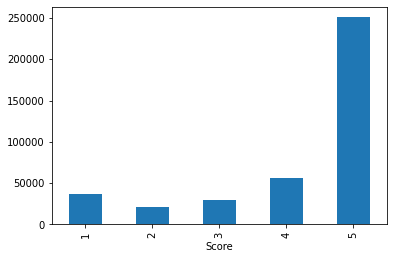

In [ ]:
# Statistics aboout data.
print("Number of records in the dataset - ",len(data))
print("Number of columns in the dataset - ",len(data.columns))
groupBasedOnScore = data.groupby('Score')
categories = groupBasedOnScore.groups.keys()
print('Review score categories - ', len(categories), list(categories))
groupBasedOnScore.size().plot(kind = "bar")
print(data['Score'][0], type(data['Score'][0]))

In [ ]:
data = data.drop(columns=['HelpfulnessNumerator','Time','HelpfulnessDenominator'])
print(data.shape)
data = data.dropna(subset=['Score', 'Text', 'Summary'])
print(data.shape)
# data = data.sample(10000, ignore_index=True)

(393579, 7)
(393576, 7)


Number of records in the dataset -  393576
Number of columns in the dataset -  7
Review score categories -  5 [1, 2, 3, 4, 5]
5 <class 'numpy.int64'>


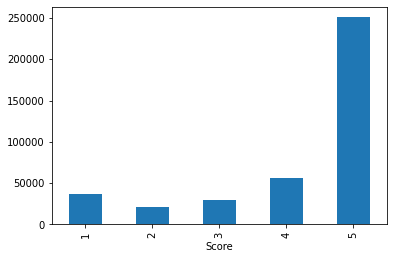

In [ ]:
# Statistics about sampled data.
print("Number of records in the dataset - ",len(data))
print("Number of columns in the dataset - ",len(data.columns))
groupBasedOnScore = data.groupby('Score')
categories = groupBasedOnScore.groups.keys()
print('Review score categories - ', len(categories), list(categories))
groupBasedOnScore.size().plot(kind = "bar")
print(data['Score'][0], type(data['Score'][0]))

In [ ]:
#In this coursework we will try to classify the product reviews into three categories - Positive, Neutral and Negative.
# Postive - Reviews with score rating 4 or 5
# Neutral - Reviews with score rating 3
# Negative - Reviews with score rating 1 and 2

# To achieve the above we will have to pre-process the data especially the score column.
for index, row in data.iterrows():

    if(row['Score'] == 5 or row['Score'] == 4):
        data.at[index,'Score'] = 2
    elif(row['Score'] == 3):
        data.at[index,'Score'] = 1
    elif(row['Score'] == 2 or row['Score'] == 1):
        data.at[index,'Score'] = 0

#graph shows number of Negative(0), Neutral(1) and Positive(2) reviews

In [ ]:
nrows = len(data)
data = data.groupby('Score', group_keys=False).apply(lambda grp: grp.sample(3333, ignore_index=True))

In [ ]:
data.reset_index(drop=True)
display(data)

,Id,ProductId,UserId,ProfileName,Score,Summary,Text
0,280202,B00346J8BO,A1HTJYZYDO0WGG,Bob,0,Don't Buy!,ConAgra has made a hugh mistake by discontinui...
1,2522,B000RUI0MS,A3LBJPREB99CSY,"Roberta Beyer ""Birding Nature Store Owner""",0,Avoid like the plague---contains product killi...,"If I could give this product a minus 10 stars,..."
2,166806,B000E1VF8Q,A3O7B83JB6L1RY,Johanna Galt,0,Product is barely edible & packages do not inc...,The quantity information on this product is in...
3,26764,B000NV9CB4,A31BD4RXCON7QO,Michael A. Duvernois,0,Mehh!,I have had good luck with Fee Brothers for oth...
4,508993,B0001N7RLQ,AZFWJDQFKPDDH,"Alyssa Hethcoat ""Healthy Mommy""",0,Blechhhh,I read ALL the reviews from other people and u...
...,...,...,...,...,...,...,...
3328,206876,B000BBY7ZC,A2LOM5G0YG54K7,paigey,2,sent flowers to Mom for her birthday...,...and I'd waited until the last minute. Falc...
3329,52062,B005O0UDTE,A19NHOV4KJEBHF,GrowingReal,2,Yummy,I love Nong Shim noodles and I have to say thi...
3330,88562,B0030MXL7E,A1I485K8K6XNNL,Craig,2,Not your children's grape drink,This is not an over-the-top sugary drink mix l...
3331,81272,B0030VBSBG,A3LWIP2I6550TB,X. Nguyen,2,Tastes so great even for adults!,These are the first finger snacks I gave my 8-...


Number of records in the dataset -  9999
Number of columns in the dataset -  7
Review score categories -  3 [0, 1, 2]
0    0
0    1
0    2
Name: Score, dtype: int64 <class 'pandas.core.series.Series'>


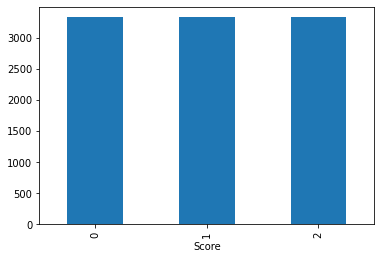

In [ ]:
# Statistics about sampled pre-processed data.
print("Number of records in the dataset - ",len(data))
print("Number of columns in the dataset - ",len(data.columns))
groupBasedOnScore = data.groupby('Score')
categories = groupBasedOnScore.groups.keys()
print('Review score categories - ', len(categories), list(categories))
groupBasedOnScore.size().plot(kind = "bar")
print(data['Score'][0], type(data['Score'][0]))

In [ ]:
print(data.groupby('Score').count())

         Id  ProductId  UserId  ProfileName  Summary  Text
Score                                                     
0      3333       3333    3333         3332     3333  3333
1      3333       3333    3333         3333     3333  3333
2      3333       3333    3333         3333     3333  3333


In [ ]:
data['Text'] = data['Summary'].astype(str) +' - '+  data['Text'].astype(str)
data = data.drop(columns=['Summary'])

In [ ]:
def cleanhtml(raw_html):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    sent = re.sub(HTMLRE, '', raw_html)
    sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
    sent = re.sub('\s+', ' ', sent)  # remove newline chars
    sent = re.sub("\'", "", sent)  # remove single quotes
    sent = re.sub(r'http\S+', '', sent) # remove hypertext link
    sent = emoji_pattern.sub(r'', sent) # remove emoji
    sent = re.sub('[%s]' % re.escape(string.punctuation), ' ' , sent)
    sent = sent.lower()
    return sent

#Cleaning up html tags
data['Text'] = data.apply(lambda row: cleanhtml(row['Text']), axis=1)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

data['Text'] = data['Text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# #remove punctuations
data['Text'] = data['Text'].apply(lambda x: " ".join(x.split()))

In [ ]:
display(data.head(5))

,Id,ProductId,UserId,ProfileName,Score,Text
0,280202,B00346J8BO,A1HTJYZYDO0WGG,Bob,0,dont buy conagra made hugh mistake discontinui...
1,2522,B000RUI0MS,A3LBJPREB99CSY,"Roberta Beyer ""Birding Nature Store Owner""",0,avoid like plague contains product killing hon...
2,166806,B000E1VF8Q,A3O7B83JB6L1RY,Johanna Galt,0,product barely edible packages include amount ...
3,26764,B000NV9CB4,A31BD4RXCON7QO,Michael A. Duvernois,0,mehh good luck fee brothers mixers orgeat blan...
4,508993,B0001N7RLQ,AZFWJDQFKPDDH,"Alyssa Hethcoat ""Healthy Mommy""",0,blechhhh read reviews people ugh made mistake ...


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your data into a pandas DataFrame

# Split the DataFrame into training, validation, and testing sets
train, val_test = train_test_split(data, test_size=0.4, random_state=42)
valid, test = train_test_split(val_test, test_size=0.5, random_state=42)

# Print the sizes of each set
print(f'Training set size: {len(train)}')
print(f'Validation set size: {len(valid)}')
print(f'Testing set size: {len(test)}')


Training set size: 5999
Validation set size: 2000
Testing set size: 2000


5999


<AxesSubplot: xlabel='Score'>

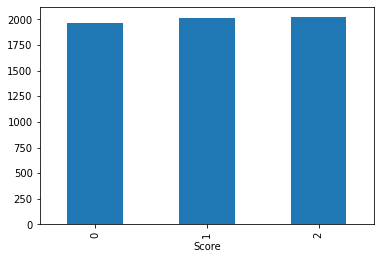

In [ ]:
print(len(train))
train.groupby('Score', group_keys=False).size().plot(kind = "bar")

2000


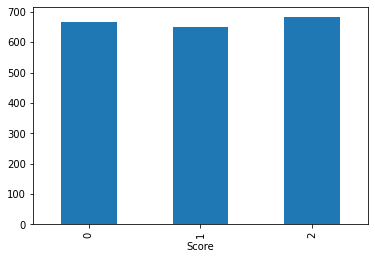

In [ ]:
print(len(valid))
validCategories = valid.groupby('Score', group_keys=False).size().plot(kind = "bar")


2000


<AxesSubplot: xlabel='Score'>

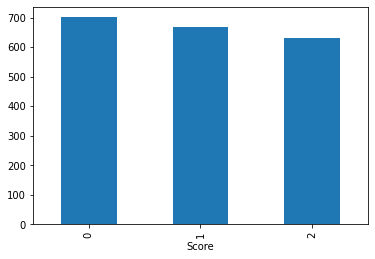

In [ ]:
print(len(test))
test.groupby('Score', group_keys=False).size().plot(kind = "bar")

In [ ]:
dataCounter = pd.DataFrame()
dataCounter['Dataset'] = ['Training', 'Validation', 'Testing']
dataCounter['#'] = [len(train),len(valid),len(test)]
display(dataCounter)

,Dataset,#
0,Training,5999
1,Validation,2000
2,Testing,2000


In [ ]:
myStopWords = text.ENGLISH_STOP_WORDS
vectorizer = TfidfVectorizer(min_df=2,strip_accents="unicode", stop_words=list(myStopWords))
X = vectorizer.fit_transform(train['Text'])
V = vectorizer.transform(valid['Text'])
vocabList = vectorizer.get_feature_names_out()
vocabDict = {item: index for index, item in enumerate(vocabList)}
print(len(vocabDict))

8850


In [ ]:
denseMatrixDataTrain = np.squeeze(np.asarray(X.todense()))
denseMatrixDataValid = np.squeeze(np.asarray(V.todense()))

In [ ]:
#Convert data into one hot vectorizer
hotVectorizer = CountVectorizer(binary=True, strip_accents="unicode", min_df=2, stop_words=list(myStopWords))
hotVectorTrainX = hotVectorizer.fit_transform(train['Text']).toarray()
hotVectorValidX = hotVectorizer.transform(valid['Text']).toarray()

In [ ]:
print(hotVectorTrainX.shape)

(5999, 8850)


In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
#Kmeans
import numpy as np

class KMeans:
    def __init__(self, k=2, max_iter=100):
        self.k = k
        self.max_iter = max_iter

    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]
        for i in range(self.max_iter):
            distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
            labels = np.argmin(distances, axis=0)
            for j in range(self.k):
                if np.sum(labels == j) > 0:
                    self.centroids[j] = X[labels == j].mean(axis=0)

    def predict(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)


In [ ]:
KmeansModel = KMeans(k=5, max_iter=200)
KmeansModel.fit(denseMatrixDataTrain)

In [ ]:
labels = KmeansModel.predict(denseMatrixDataTrain)

In [ ]:
for i in range(5):
    print(f"Cluster {i}:")
    cluster_docs = train['Text'][labels == i].sample(5)
    for j, doc in enumerate(cluster_docs):
        print(f"\t{j+1}. {doc}")
    print()


Cluster 0:
	1. crushed good product good price chips survived intact crumbs pieces tasty still way many crumbs pieces smaller bags travelled better less damage
	2. bland great loved mcdougalls soups tried hard time recommending one pretty bland size cup bit smaller others worth price like texture soup however
	3. couldnt get cat care cat scratched maybe twice never maybe placed weight base like mentioned stop sliding around would used ended making diy post sisal rope wood tube cardboard carpet gets sold cats may like built exactly like would expected cardboard
	4. excellent product quite simply wonderful flax seed oil one often drawn product reviews known reputation spectrum products filtered oil use daily needs important deciding brand due auto immune condition like proportion omega 3s product flax seed oil best used within two months opening always keep refrigerated purchased smaller containers past whole foods seemed like frugal option happy product sent protection heat arrived prom

In [ ]:
for i in range(5):
    centroid = KmeansModel.centroids[i].tolist()
    sorted_indices = np.argsort(centroid)[::-1]
    top_tokens = [list(vocabDict.keys())[list(vocabDict.values()).index(idx)] for idx in sorted_indices[:5]]
    print(f"Cluster {i}: {top_tokens}")

Cluster 0: ['product', 'good', 'great', 'amazon', 'price']
Cluster 1: ['coffee', 'cup', 'flavor', 'like', 'taste']
Cluster 2: ['taste', 'like', 'flavor', 'chocolate', 'good']
Cluster 3: ['tea', 'green', 'teas', 'flavor', 'taste']
Cluster 4: ['dog', 'food', 'dogs', 'treats', 'cats']


In [ ]:
from sklearn.metrics import confusion_matrix
target_labels = train['Score']

# Assign target labels to each cluster
assigned_labels = []
for i in range(KmeansModel.k):
    cluster_indices = np.where(labels == i)[0]
    cluster_target_labels = labels[cluster_indices]
    assigned_label = np.bincount(cluster_target_labels).argmax()
    assigned_labels.append(assigned_label)

# Construct confusion matrix
conf_matrix = confusion_matrix(target_labels, [assigned_labels[label] for label in labels])

In [ ]:
print(conf_matrix)

[[1133  144  456   84  147]
 [ 954  206  610  112  133]
 [1175  154  367  141  183]
 [   0    0    0    0    0]
 [   0    0    0    0    0]]


In [ ]:
#Question3

dummy_clf_modelMF = DummyClassifier(strategy="most_frequent")
dummy_clf_modelMF.fit(train['Text'], train['Score'].to_numpy())

predT_MF_clfY = dummy_clf_modelMF.predict(train['Text'])
print("Dummy Classifier with most_frequent strategy - (training set)")
print(classification_report(train['Score'].to_numpy(), predT_MF_clfY))




pred_MF_clfY = dummy_clf_modelMF.predict(valid['Text'])
#print("Dummy Classifier with most_frequent strategy - (validation set)")
#print(classification_report(valid['Score'].to_numpy(), pred_MF_clfY))


Dummy Classifier with most_frequent strategy - (training set)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1964
           1       0.00      0.00      0.00      2015
           2       0.34      1.00      0.50      2020

    accuracy                           0.34      5999
   macro avg       0.11      0.33      0.17      5999
weighted avg       0.11      0.34      0.17      5999



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
baseline1 = classification_report(valid['Score'].to_numpy(), pred_MF_clfY, output_dict=True)
metrics = ['accuracy', 'precision', 'recall', 'f1-score']
data = [[baseline1['accuracy']] + [baseline1['macro avg'][metric] for metric in metrics[1:]]]
bl1 = pd.DataFrame(data, columns=metrics)
print("Dummy Classifier with most_frequent strategy - (validation set)")
bl1.insert(0,'Model', ['Dummy Classifier with most_frequent strategy'])
display(bl1)

Dummy Classifier with most_frequent strategy - (validation set)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,accuracy,precision,recall,f1-score
0,Dummy Classifier with most_frequent strategy,0.341,0.113667,0.333333,0.169525


In [ ]:
dummy_clf_modelS = DummyClassifier(strategy="stratified")
dummy_clf_modelS.fit(train['Text'], train['Score'].to_numpy())

predT_S_Y = dummy_clf_modelS.predict(train['Text'])

print("Dummy Classifier with most_frequent strategy - (training set)")
print(classification_report(train['Score'].to_numpy(), predT_S_Y))


pred_S_Y = dummy_clf_modelS.predict(valid['Text'])

print("Dummy Classifier with stratified strategy - (validation set)")
#print(classification_report(valid['Score'].to_numpy(), pred_S_Y))


Dummy Classifier with most_frequent strategy - (training set)
              precision    recall  f1-score   support

           0       0.35      0.34      0.35      1964
           1       0.34      0.35      0.35      2015
           2       0.34      0.34      0.34      2020

    accuracy                           0.34      5999
   macro avg       0.34      0.34      0.34      5999
weighted avg       0.34      0.34      0.34      5999

Dummy Classifier with stratified strategy - (validation set)


In [ ]:
baseline2 = classification_report(valid['Score'].to_numpy(), pred_S_Y, output_dict=True)

metrics = ['accuracy', 'precision', 'recall', 'f1-score']
data = [[baseline2['accuracy']] + [baseline2['macro avg'][metric] for metric in metrics[1:]]]
bl2 = pd.DataFrame(data, columns=metrics)
bl2.insert(0,'Model', ['Dummy Classifier with stratified strategy'])
display(bl2)

,Model,accuracy,precision,recall,f1-score
0,Dummy Classifier with stratified strategy,0.343,0.34299,0.343237,0.342998


In [ ]:
#Logistic REgression with TF-IDF
clf_tfidf = LogisticRegression(random_state=0, multi_class='multinomial').fit(denseMatrixDataTrain, train['Score'])

clf_tfidf_predYT = clf_tfidf.predict(denseMatrixDataTrain)
print("Logistic Regression with TF-IDF - (training set)")
print(classification_report(train['Score'].to_numpy(), clf_tfidf_predYT))


clf_tfidf_predY = clf_tfidf.predict(denseMatrixDataValid)
print("Logistic Regression with TF-IDF - (validation set)")
print(classification_report(valid['Score'].to_numpy(), clf_tfidf_predY))


Logistic Regression with TF-IDF - (training set)
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1964
           1       0.84      0.84      0.84      2015
           2       0.90      0.90      0.90      2020

    accuracy                           0.87      5999
   macro avg       0.87      0.87      0.87      5999
weighted avg       0.87      0.87      0.87      5999

Logistic Regression with TF-IDF - (validation set)
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       668
           1       0.58      0.56      0.57       650
           2       0.74      0.76      0.75       682

    accuracy                           0.67      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       0.67      0.67      0.67      2000



In [ ]:
baseline3 = classification_report(valid['Score'].to_numpy(), clf_tfidf_predY, output_dict=True)

metrics = ['accuracy', 'precision', 'recall', 'f1-score']
data = [[baseline3['accuracy']] + [baseline3['macro avg'][metric] for metric in metrics[1:]]]
bl3 = pd.DataFrame(data, columns=metrics)
bl3.insert(0,'Model', ['Logistic Regression with TF-IDF'])
display(bl3)

,Model,accuracy,precision,recall,f1-score
0,Logistic Regression with TF-IDF,0.6735,0.67074,0.67189,0.671239


# One hot vector models



In [ ]:
# Logistic Regression on one hot vectors
clf_hot_vector = LogisticRegression(random_state=0, multi_class='multinomial').fit(hotVectorTrainX, train['Score'].to_numpy())
clf_hot_predYT = clf_hot_vector.predict(hotVectorTrainX)


print("Logistic Regression with Count Vecotrizer - (training set)")
print(classification_report(train['Score'].to_numpy(), clf_hot_predYT))


clf_hot_predYT = clf_hot_vector.predict(hotVectorValidX)

print("Logistic Regression with Count Vecotrizer - (validation set)")
print(classification_report(valid['Score'].to_numpy(), clf_hot_predYT))


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression with Count Vecotrizer - (training set)
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1964
           1       0.99      0.98      0.98      2015
           2       0.99      0.99      0.99      2020

    accuracy                           0.99      5999
   macro avg       0.99      0.99      0.99      5999
weighted avg       0.99      0.99      0.99      5999

Logistic Regression with Count Vecotrizer - (validation set)
              precision    recall  f1-score   support

           0       0.68      0.63      0.66       668
           1       0.53      0.55      0.54       650
           2       0.71      0.73      0.72       682

    accuracy                           0.64      2000
   macro avg       0.64      0.64      0.64      2000
weighted avg       0.64      0.64      0.64      2000



In [ ]:
baseline4 = classification_report(valid['Score'].to_numpy(), clf_hot_predYT, output_dict=True)

metrics = ['accuracy', 'precision', 'recall', 'f1-score']
data = [[baseline4['accuracy']] + [baseline4['macro avg'][metric] for metric in metrics[1:]]]
bl4 = pd.DataFrame(data, columns=metrics)
bl4.insert(0,'Model', ['Logistic Regression with Count Vecotrizer'])
display(bl4)

,Model,accuracy,precision,recall,f1-score
0,Logistic Regression with Count Vecotrizer,0.6385,0.639034,0.637102,0.637713


In [ ]:
#SVC Classifier on one-hot_vectors
print(hotVectorTrainX.shape)
svmModel =  svm.SVC()
svmModel.fit(hotVectorTrainX, train['Score'])


(5999, 8850)


SVC()

In [ ]:
svmPredYT = svmModel.predict(hotVectorTrainX)
print("SVM with Count Vecotrizer - (training set)")
print(classification_report(train['Score'].to_numpy(), svmPredYT))


SVM with Count Vecotrizer - (training set)
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1964
           1       0.93      0.89      0.91      2015
           2       0.94      0.95      0.94      2020

    accuracy                           0.93      5999
   macro avg       0.93      0.93      0.93      5999
weighted avg       0.93      0.93      0.93      5999



In [ ]:
svmPredYV = svmModel.predict(hotVectorValidX)

print("SVM with Count Vecotrizer - (validation set)")
print(classification_report(valid['Score'].to_numpy(), svmPredYV))

SVM with Count Vecotrizer - (validation set)
              precision    recall  f1-score   support

           0       0.68      0.65      0.67       668
           1       0.55      0.63      0.59       650
           2       0.79      0.71      0.75       682

    accuracy                           0.67      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       0.68      0.67      0.67      2000



In [ ]:
baseline5 = classification_report(valid['Score'].to_numpy(), svmPredYV, output_dict=True)

metrics = ['accuracy', 'precision', 'recall', 'f1-score']
data = [[baseline5['accuracy']] + [baseline5['macro avg'][metric] for metric in metrics[1:]]]
bl5 = pd.DataFrame(data, columns=metrics)
bl5.insert(0,'Model', ['SVM with Count Vecotrizer'])
display(bl5)

,Model,accuracy,precision,recall,f1-score
0,SVM with Count Vecotrizer,0.6665,0.67386,0.665857,0.668302


In [ ]:
#Random Forest using TFIDF vectorizer

from sklearn.ensemble import RandomForestClassifier
rfModel = RandomForestClassifier()
rfModel.fit(denseMatrixDataTrain, train['Score'])

rfT_preds = rfModel.predict(denseMatrixDataTrain)
trainingRfReport = classification_report(train['Score'], rfT_preds)
print(trainingRfReport)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1964
           1       1.00      1.00      1.00      2015
           2       1.00      1.00      1.00      2020

    accuracy                           1.00      5999
   macro avg       1.00      1.00      1.00      5999
weighted avg       1.00      1.00      1.00      5999



In [ ]:
rfV_preds = rfModel.predict(denseMatrixDataValid)
trainingRfReport = classification_report(valid['Score'], rfV_preds)
print(trainingRfReport)

              precision    recall  f1-score   support

           0       0.68      0.65      0.66       668
           1       0.56      0.58      0.57       650
           2       0.72      0.74      0.73       682

    accuracy                           0.66      2000
   macro avg       0.66      0.65      0.65      2000
weighted avg       0.66      0.66      0.66      2000



In [ ]:
baseline6 = classification_report(valid['Score'], rfV_preds, output_dict=True)

metrics = ['accuracy', 'precision', 'recall', 'f1-score']
data = [[baseline6['accuracy']] + [baseline6['macro avg'][metric] for metric in metrics[1:]]]
bl6 = pd.DataFrame(data, columns=metrics)
bl6.insert(0,'Model', ['Random Forest with TFIDF Vecotrizer'])
display(bl6)

,Model,accuracy,precision,recall,f1-score
0,Random Forest with TFIDF Vecotrizer,0.656,0.655068,0.654696,0.654708


In [ ]:
combinedbaseline = pd.concat([bl1,bl2,bl3,bl4,bl5,bl6], axis=0).reset_index()
display(combinedbaseline)

,index,Model,accuracy,precision,recall,f1-score
0,0,Dummy Classifier with most_frequent strategy,0.3410,0.113667,0.333333,0.169525
1,0,Dummy Classifier with stratified strategy,0.3430,0.342990,0.343237,0.342998
2,0,Logistic Regression with TF-IDF,0.6735,0.670740,0.671890,0.671239
3,0,Logistic Regression with Count Vecotrizer,0.6385,0.639034,0.637102,0.637713
4,0,SVM with Count Vecotrizer,0.6665,0.673860,0.665857,0.668302
5,0,Random Forest with TFIDF Vecotrizer,0.6560,0.655068,0.654696,0.654708


In [ ]:
# grid search for best parameters
from sklearn.pipeline import Pipeline
param_grid = {
    'tfidf__max_features': [5000,6000, 7000, 8000],
    'tfidf__sublinear_tf': [True, False],
    'tfidf__max_df': [0.8,0.7, 0.9],
    'lr__C': [0.01,0.1, 0.5,1.0,10.0,100.0],
    'lr__penalty': [None, 'l1','l2']
}
pipe= Pipeline([
    ('tfidf',TfidfVectorizer(stop_words=list(myStopWords))),
    ('lr', LogisticRegression())
])
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(train['Text'], train['Score'])
tuned_model = grid_search.best_estimator_


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
print(tuned_model.get_feature_names_out)
print(tuned_model.named_steps['lr'].C)
print(tuned_model.named_steps['lr'].penalty)

<bound method Pipeline.get_feature_names_out of Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.8, max_features=7000,
                                 stop_words=['except', 'nobody', 'off', 'bill',
                                             'de', 'describe', 'these', 'whole',
                                             'itself', 'will', 'few', 'beyond',
                                             'but', 'more', 'which', 'after',
                                             'must', 'here', 'with', 'beside',
                                             'thereby', 'thick', 'none', 'you',
                                             'whoever', 'through', 'anything',
                                             'afterwards', 'moreover', 'ie', ...],
                                 sublinear_tf=True)),
                ('lr', LogisticRegression())])>
1.0
l2


In [ ]:
bestTfidfConfig = TfidfVectorizer(stop_words=list(myStopWords), max_df=0.8, max_features=7000, sublinear_tf=True)
newTrainX = bestTfidfConfig.fit_transform(train['Text'])
newValidX = bestTfidfConfig.transform(valid['Text'])

bestLr= LogisticRegression(random_state=0, penalty=tuned_model.named_steps['lr'].penalty, C=tuned_model.named_steps['lr'].C).fit(newTrainX, train['Score'])
predictedValues = bestLr.predict(newValidX)
newReport = classification_report(valid['Score'].to_numpy(), predictedValues, digits=3)

In [ ]:
print(newReport)

              precision    recall  f1-score   support

           0      0.708     0.692     0.699       668
           1      0.600     0.586     0.593       650
           2      0.751     0.784     0.768       682

    accuracy                          0.689      2000
   macro avg      0.686     0.687     0.687      2000
weighted avg      0.688     0.689     0.688      2000



# Question 5 - Context Vectors using BERT

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 100.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 23.4 MB/s eta 0:00:00


In [ ]:
from transformers import RobertaTokenizer, RobertaTokenizer,AutoModelForSequenceClassification, AutoTokenizer, RobertaModel, pipeline, RobertaForSequenceClassification, Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset

In [ ]:
pipe = pipeline(model='roberta-base', task='feature-extraction')

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
cls = []
for text in train['Text']:
  features= pipe(text, max_length=512, truncation=True, padding=True)
  cls.append(features[0][0])


In [ ]:
from sklearn.linear_model import LogisticRegression
from torch.utils.data import DataLoader

In [ ]:
bertTokenLr = LogisticRegression(max_iter=1000)
bertTokenLr.fit(cls, train['Score'])

LogisticRegression(max_iter=1000)

In [ ]:
valid_cls = []
for text in valid['Text']:
  features= pipe(text, max_length=512, truncation=True, padding=True)
  valid_cls.append(features[0][0])

In [ ]:
predictionsByBert = bertTokenLr.predict(valid_cls)

In [ ]:
predictTraining = bertTokenLr.predict(cls)

In [ ]:
bertLrreport = classification_report(valid['Score'], predictionsByBert)
bertTraningRep = classification_report(train['Score'], predictTraining)

In [ ]:
print('BERT classification report - Training set')
print(bertTraningRep)


print('BERT classification report - Validation set')
print(bertLrreport)


BERT classification report - Training set
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1964
           1       0.63      0.61      0.62      2015
           2       0.77      0.79      0.78      2020

    accuracy                           0.70      5999
   macro avg       0.70      0.70      0.70      5999
weighted avg       0.70      0.70      0.70      5999

BERT classification report - Validation set
              precision    recall  f1-score   support

           0       0.69      0.70      0.69       668
           1       0.60      0.58      0.59       650
           2       0.76      0.77      0.77       682

    accuracy                           0.69      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.68      0.69      0.68      2000



## 5b


In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 23.2 MB/s eta 0:00:00


In [ ]:
tokenizerB = RobertaTokenizer.from_pretrained('roberta-base')

In [ ]:
trainInputs = tokenizerB(train['Text'].tolist(), padding=True, truncation=True)
validInputs = tokenizerB(valid['Text'].tolist(), padding=True, truncation=True)
testInputs = tokenizerB(test['Text'].tolist(), padding=True, truncation=True)

In [ ]:
newModel = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'roberta.pooler.dense.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

In [ ]:
# !pip install datasets
from datasets import Dataset
train_dataset = Dataset.from_dict({
    'input_ids': trainInputs['input_ids'],
    'attention_mask': trainInputs['attention_mask'],
    'labels': train['Score'].to_list()
})
valid_dataset = Dataset.from_dict({
    'input_ids': validInputs['input_ids'],
    'attention_mask': validInputs['attention_mask'],
    'labels': valid['Score'].to_list()
})
test_dataset = Dataset.from_dict({
    'input_ids': testInputs['input_ids'],
    'attention_mask': testInputs['attention_mask'],
    'labels': test['Score'].to_list()
})

In [ ]:
from datasets import load_metric
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the accuracy metric
#accuracy_score = load_metric("accuracy")
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    acc = accuracy_score(labels, preds)
    return {
        'accuracy_score': acc,
        'precision': precision_score(labels, preds, average='macro'),
        'recall': recall_score(labels, preds, average='macro'),
        'f1': f1_score(labels, preds, average='macro'),
        'confusion_matrix': confusion_matrix(labels, preds)
    }

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',          # Output directory
    num_train_epochs=1,              # Total number of training epochs
    per_device_train_batch_size=16,  # Batch size per device during training
    per_device_eval_batch_size=16,   # Batch size for evaluation
    logging_dir='./logs',            # Directory for storing logs
    learning_rate=1e-4,              # Learning rate
    weight_decay=0
)

In [ ]:

trainer = Trainer(
    model=newModel,                     # The instantiated Transformers model to be trained
    args=training_args,              # Training arguments
    train_dataset=train_dataset,
    eval_dataset= valid_dataset,
    compute_metrics=compute_metrics
)

In [ ]:
trainer.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 5999
  Num Epochs = 1
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 375
  Number of trainable parameters = 124647939


Step,Training Loss




Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=375, training_loss=1.1068819173177082, metrics={'train_runtime': 146.3767, 'train_samples_per_second': 40.983, 'train_steps_per_second': 2.562, 'total_flos': 1578417392950272.0, 'train_loss': 1.1068819173177082, 'epoch': 1.0})

In [ ]:
resultsFor5b = trainer.evaluate()

***** Running Evaluation *****
  Num examples = 2000
  Batch size = 16


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(resultsFor5b)

{'eval_loss': 1.0996042490005493, 'eval_accuracy_score': 0.341, 'eval_precision': 0.11366666666666668, 'eval_recall': 0.3333333333333333, 'eval_f1': 0.16952522992791452, 'eval_runtime': 15.382, 'eval_samples_per_second': 130.022, 'eval_steps_per_second': 8.126, 'epoch': 1.0}


**5C** - We will now create **3 different models** with different trainin arguements for **epochs, learning rate and batch size**

In [ ]:
newModel1 = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)
training_args_for_model1 = TrainingArguments(
    output_dir='./results',          # Output directory
    num_train_epochs=5,              # Total number of training epochs
    per_device_train_batch_size=16,  # Batch size per device during training
    per_device_eval_batch_size=16,   # Batch size for evaluation
    logging_dir='./logs',            # Directory for storing logs
    learning_rate=1e-6              # Learning rate

)

trainer1 = Trainer(
    model=newModel1,                     # The instantiated Transformers model to be trained
    args=training_args_for_model1,              # Training arguments
    train_dataset=train_dataset,
    eval_dataset= valid_dataset,
    compute_metrics=compute_metrics
)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--roberta-base/snapshots/bc2764f8af2e92b6eb5679868df33e224075ca68/config.json
Model config RobertaConfig {
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.1",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}

loading weights file pytorch_model.bin from

In [ ]:
trainer1.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 5999
  Num Epochs = 5
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 1875
  Number of trainable parameters = 124647939


Step,Training Loss
500,1.050000
1000,0.792400
1500,0.741100


Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1500
Configuration saved in ./results/checkpoint-1500/config.json
Model weights saved in ./results/checkpoint-1500/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=1875, training_loss=0.8308439127604167, metrics={'train_runtime': 720.218, 'train_samples_per_second': 41.647, 'train_steps_per_second': 2.603, 'total_flos': 7892086964751360.0, 'train_loss': 0.8308439127604167, 'epoch': 5.0})

In [ ]:
resultsForModel1 = trainer1.evaluate()

***** Running Evaluation *****
  Num examples = 2000
  Batch size = 16


In [ ]:
print(resultsForModel1)

{'eval_loss': 0.7006431221961975, 'eval_accuracy_score': 0.6945, 'eval_precision': 0.6878222277904223, 'eval_recall': 0.6921207708652175, 'eval_f1': 0.6884586538384063, 'eval_runtime': 13.6738, 'eval_samples_per_second': 146.265, 'eval_steps_per_second': 9.142, 'epoch': 5.0}


In [ ]:
newModel2 = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)
training_args_for_model2 = TrainingArguments(
    output_dir='./results',          # Output directory
    num_train_epochs=15,              # Total number of training epochs
    per_device_train_batch_size=16,  # Batch size per device during training
    per_device_eval_batch_size=16,   # Batch size for evaluation
    logging_dir='./logs',            # Directory for storing logs
    learning_rate=1e-5              # Learning rate

)

trainer2 = Trainer(
    model=newModel2,                     # The instantiated Transformers model to be trained
    args=training_args_for_model2,              # Training arguments
    train_dataset=train_dataset,
    eval_dataset= valid_dataset,
    compute_metrics=compute_metrics
)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'roberta.pooler.dense.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

In [ ]:
trainer2.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 5999
  Num Epochs = 15
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 5625
  Number of trainable parameters = 124647939


Step,Training Loss
500,0.751400
1000,0.552500
1500,0.441600
2000,0.341600
2500,0.255200
3000,0.215200
3500,0.176700
4000,0.141800
4500,0.115600
5000,0.104100


Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1500
Configuration saved in ./results/checkpoint-1500/config.json
Model weights saved in ./results/checkpoint-1500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-2000
Configuration saved in ./results/checkpoint-2000/config.json
Model weights saved in ./results/checkpoint-2000/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-2500
Configuration saved in ./results/checkpoint-2500/config.json
Model weights saved in ./results/checkpoint-2500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-3000
Configuration saved in ./results/checkpoint-3

TrainOutput(global_step=5625, training_loss=0.28429991455078124, metrics={'train_runtime': 2172.075, 'train_samples_per_second': 41.428, 'train_steps_per_second': 2.59, 'total_flos': 2.367626089425408e+16, 'train_loss': 0.28429991455078124, 'epoch': 15.0})

In [ ]:
resultsForModel2 = trainer2.evaluate()

***** Running Evaluation *****
  Num examples = 2000
  Batch size = 16


Trainer is attempting to log a value of "[[493 149  26]
 [154 422  74]
 [ 30 114 538]]" of type <class 'numpy.ndarray'> for key "eval/confusion_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


In [ ]:
print(resultsForModel2)

{'eval_loss': 1.7727733850479126, 'eval_accuracy_score': 0.7265, 'eval_precision': 0.7291770951167594, 'eval_recall': 0.7253703421039717, 'eval_f1': 0.7268155849459887, 'eval_confusion_matrix': array([[493, 149,  26],
       [154, 422,  74],
       [ 30, 114, 538]]), 'eval_runtime': 15.4289, 'eval_samples_per_second': 129.627, 'eval_steps_per_second': 8.102, 'epoch': 15.0}


In [ ]:
newModel3 = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)
training_args_for_model3 = TrainingArguments(
    output_dir='./results',          # Output directory
    num_train_epochs=15,              # Total number of training epochs
    per_device_train_batch_size=32,  # Batch size per device during training
    per_device_eval_batch_size=32,   # Batch size for evaluation
    logging_dir='./logs',            # Directory for storing logs
    learning_rate=1e-6              # Learning rate

)

trainer3 = Trainer(
    model=newModel3,                     # The instantiated Transformers model to be trained
    args=training_args_for_model3,              # Training arguments
    train_dataset=train_dataset,
    eval_dataset= valid_dataset,
    compute_metrics=compute_metrics
)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--roberta-base/snapshots/bc2764f8af2e92b6eb5679868df33e224075ca68/config.json
Model config RobertaConfig {
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.1",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}

loading weights file pytorch_model.bin from

In [ ]:
trainer3.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 5999
  Num Epochs = 15
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 2820
  Number of trainable parameters = 124647939


Step,Training Loss
500,0.964700
1000,0.708600
1500,0.642000
2000,0.610300
2500,0.603100


Saving model checkpoint to ./results/checkpoint-500
Configuration saved in ./results/checkpoint-500/config.json
Model weights saved in ./results/checkpoint-500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-1500
Configuration saved in ./results/checkpoint-1500/config.json
Model weights saved in ./results/checkpoint-1500/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-2000
Configuration saved in ./results/checkpoint-2000/config.json
Model weights saved in ./results/checkpoint-2000/pytorch_model.bin
Saving model checkpoint to ./results/checkpoint-2500
Configuration saved in ./results/checkpoint-2500/config.json
Model weights saved in ./results/checkpoint-2500/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=2820, training_loss=0.692800021340661, metrics={'train_runtime': 2011.9319, 'train_samples_per_second': 44.726, 'train_steps_per_second': 1.402, 'total_flos': 2.367626089425408e+16, 'train_loss': 0.692800021340661, 'epoch': 15.0})

In [ ]:
resultsForModel3 = trainer3.evaluate()

***** Running Evaluation *****
  Num examples = 2000
  Batch size = 32


Trainer is attempting to log a value of "[[470 165  33]
 [157 407  86]
 [ 24 107 551]]" of type <class 'numpy.ndarray'> for key "eval/confusion_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


In [ ]:
print(resultsForModel3)

{'eval_loss': 0.6731984615325928, 'eval_accuracy_score': 0.714, 'eval_precision': 0.7145883879728788, 'eval_recall': 0.7125548496960512, 'eval_f1': 0.7134134862425064, 'eval_confusion_matrix': array([[470, 165,  33],
       [157, 407,  86],
       [ 24, 107, 551]]), 'eval_runtime': 14.5725, 'eval_samples_per_second': 137.245, 'eval_steps_per_second': 4.323, 'epoch': 15.0}


### Question 6

In [ ]:
# Question 6
predictions, labels, metrics = trainer2.predict(test_dataset)
print(predictions)
print(labels)
print(metrics)


***** Running Prediction *****
  Num examples = 2000
  Batch size = 16


[[-0.9400872 -3.2058184  4.097855 ]
 [-2.698793  -2.87779    5.6583076]
 [-2.9518213 -2.881919   5.6840982]
 ...
 [ 5.102221  -2.2952921 -3.312667 ]
 [-2.9653533 -2.8243     5.699519 ]
 [ 5.2796483 -2.4139059 -3.3151057]]
[2 1 2 ... 0 1 0]
{'test_loss': 1.8803484439849854, 'test_accuracy_score': 0.7105, 'test_precision': 0.7105337555576551, 'test_recall': 0.7118073559864407, 'test_f1': 0.7111307037054241, 'test_confusion_matrix': array([[513, 162,  26],
       [154, 403, 111],
       [ 36,  90, 505]]), 'test_runtime': 15.3978, 'test_samples_per_second': 129.889, 'test_steps_per_second': 8.118}


In [ ]:
test = test.assign(test_result=labels)
display(test)

,Id,ProductId,UserId,ProfileName,Score,Text,test_result
2250,279485,B000GZSDPS,AQBYJX8XPSRYV,Neil's Mommy,2,5 year old peanut butter addict likes better 2...,2
2870,51422,B001XWRE3K,AF62W6NCDXM6E,ls,1,terrific combo combination lemon garlic wonder...,1
443,11361,B001QPK116,A3N5ATYP7UKEYR,VA,2,mmm mmm good friend mine recommended chocolate...,2
220,438786,B005HGAV8I,ALGW6QDPHGQYZ,"Michelle Hunt ""karma56""",0,even close 20 varieties wanted 8 spicy eggnogs...,0
69,381171,B001EQ4HVC,AJZK5V6Q1WHFD,"Mark Twain ""Straightforward""",0,price raised 24 wow sold amazon 12 84 4 jars b...,0
...,...,...,...,...,...,...,...
1156,357308,B001E3VY7A,A2LJAQ5OCLTU10,dmh,0,slow grow low yield title says nurture seeds w...,0
1180,483103,B00068K1AA,A1M1Y8VQEYGEU6,Alexandra O'donoghue,0,buyer beware bought cat food per breeders reco...,0
2697,222558,B000F4ET58,AMAI5OW9O3GSB,mom74,0,disappointed bought crackers store loved crisp...,0
1328,544910,B000V1AWBK,A3JWUFBEH12B4U,"albgardis Tausendschoen ""vegetarian witchy chef""",1,vegetarian organic really good spicy europeans...,1


In [ ]:
print(metrics['test_confusion_matrix'])

[[513 162  26]
 [154 403 111]
 [ 36  90 505]]
